<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/modern_hopfield_network_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing data (irrelevant)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image

response = requests.get("https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py")

if response.status_code == 200:
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

if response.status_code == 200:
    zip_content = BytesIO(response.content)
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")

import hopfield_header as hopf

def load_letter_image(letter):
    return ((np.array(Image.open(f'letters/{letter}.png'))[:, :, 0] / 255.0) * 2 - 1).reshape(-1)

s1 = load_letter_image('?')
s2 = load_letter_image('@')
s3 = load_letter_image('&')
s4 = load_letter_image('#')
s5 = load_letter_image('%')
s6 = load_letter_image('$')
s7 = load_letter_image('eu')
s8 = load_letter_image('inf')
s9 = load_letter_image('pi')
s10 = load_letter_image('ps')
s11 = load_letter_image('se')
s12 = load_letter_image('si')
s13 = load_letter_image('sm')
s14 = load_letter_image('us')
s15 = load_letter_image('al')

n1 = load_letter_image('1')
n2 = load_letter_image('2')
n3 = load_letter_image('3')
n4 = load_letter_image('4')
n5 = load_letter_image('5')
n6 = load_letter_image('6')
n7 = load_letter_image('7')
n8 = load_letter_image('8')
n9 = load_letter_image('9')

A = load_letter_image('A')
B = load_letter_image('B')
C = load_letter_image('C')
D = load_letter_image('D')
E = load_letter_image('E')
F = load_letter_image('F')
G = load_letter_image('G')
H = load_letter_image('H')
I = load_letter_image('I')
J = load_letter_image('J')
K = load_letter_image('K')
L = load_letter_image('L')
M = load_letter_image('M')
N = load_letter_image('N')
O = load_letter_image('O')
P = load_letter_image('P')
Q = load_letter_image('Q')
R = load_letter_image('R')
S = load_letter_image('S')
T = load_letter_image('T')
U = load_letter_image('U')
W = load_letter_image('W')
X = load_letter_image('X')
Y = load_letter_image('Y')
Z = load_letter_image('Z')

letters = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,W,X,Y,Z,n1,n2,n3,n4,n5,n6,n7,n8,n9,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15]

noised_data = []
noised_data1 = letters.copy()

for i in range(len(letters)):
    noised_data.append(hopf.noise(letters[i], 80))

network1 = hopf.hopfield_net(256)
network1.set_patterns(letters)

hopfield_header.py downloaded successfully.
Letters extraction successful.


# Modern Hopfield Network

The main problem of classic Hopfield network and dense associative memory is working only on bipolar values {-1,1}. In modern neural network architectures it is must-have to work on continuous functions (calculating gradients etc.). This is why authors of *Modern Hopfield Networks* proposed new architecture with continous energy function:

$$E = -lse(\beta, X^T \xi) + \frac{1}{2} \xi^T \xi + \beta log(S) + \frac{1}{2} M^2$$

where M in maximum norm of patterns $M = max_\mu ||x^\mu||$ and lse stands for log-sum-exp function $lse(a,b) = a^{-1} log (\sum_{i=1}^N exp(a b_i))$.

New energu equation contains natural logarithm of dense associative memory function, square term of actual state and two normalziing terms. By Concave-Convex Proceudre the new update function is given by:
$$\xi^{new} = Xp = X softmax(\beta X^T \xi)$$
where *softmax* is normalized exponential function $p(a)_i = \frac{exp(a_i)}{\sum_k exp(a_i)}$.

The Modern Hopfield Network usually convergences to local energy minima in one update.


## Basic use of dense associative memory

Considering 256-neuron network with given patterns:

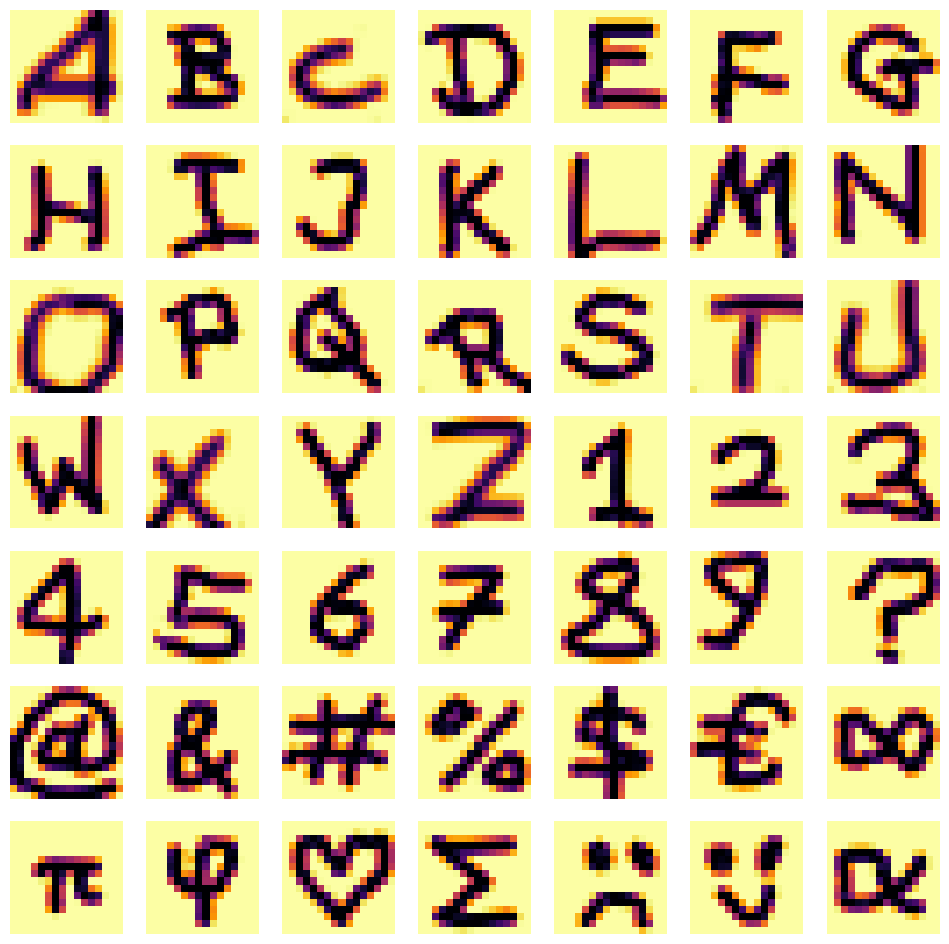

In [14]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(network1.patterns)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(network1.patterns[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

With patterns held in matrix *X* network is able to recall them, the first test dataset is:

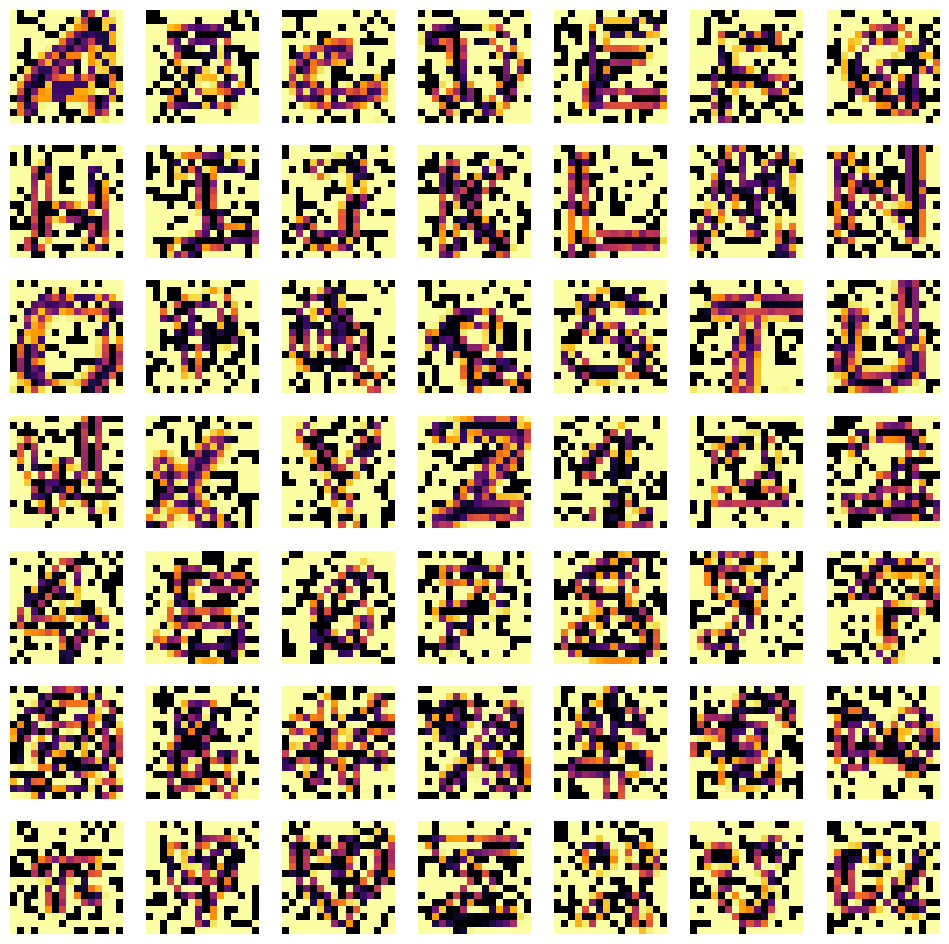

In [15]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(noised_data[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

It is just distorted version of patterns set.

Results of the model:

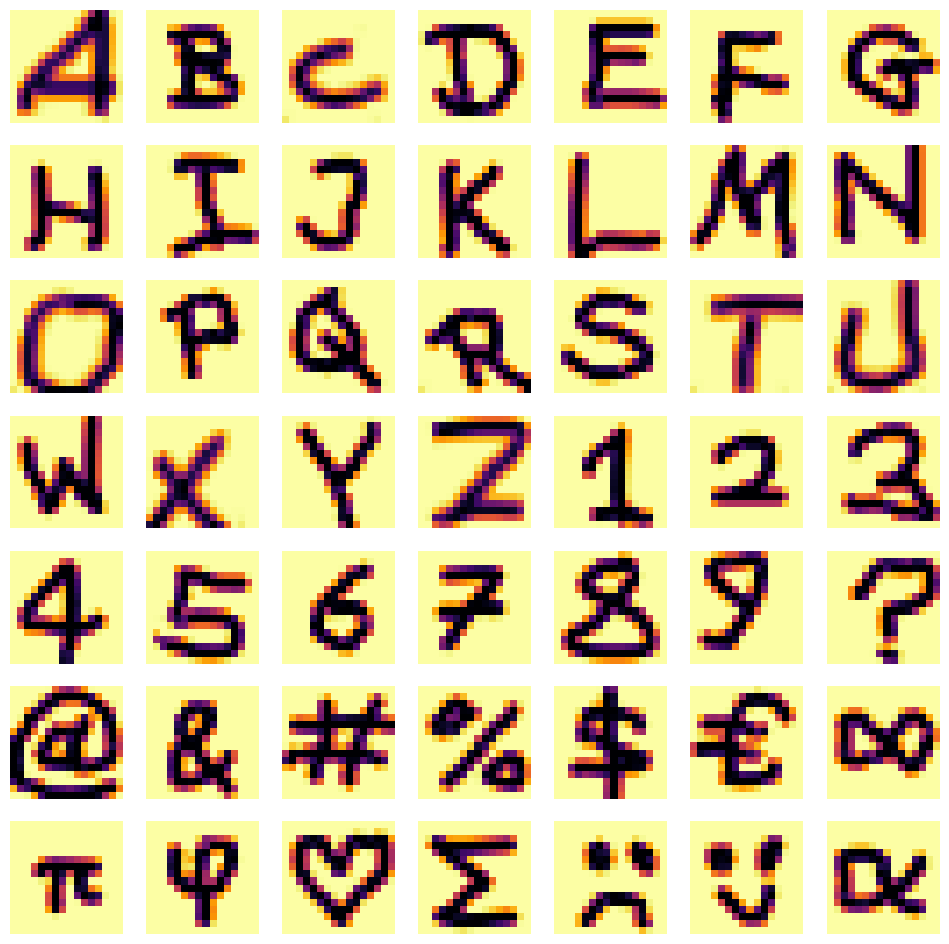

In [16]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  result, err = network1.hopfield_layer(noised_data[i],10)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Looked kinda easy for the model. Now the harder task.

Second dataset is set of patterns with only 25% pixels given:

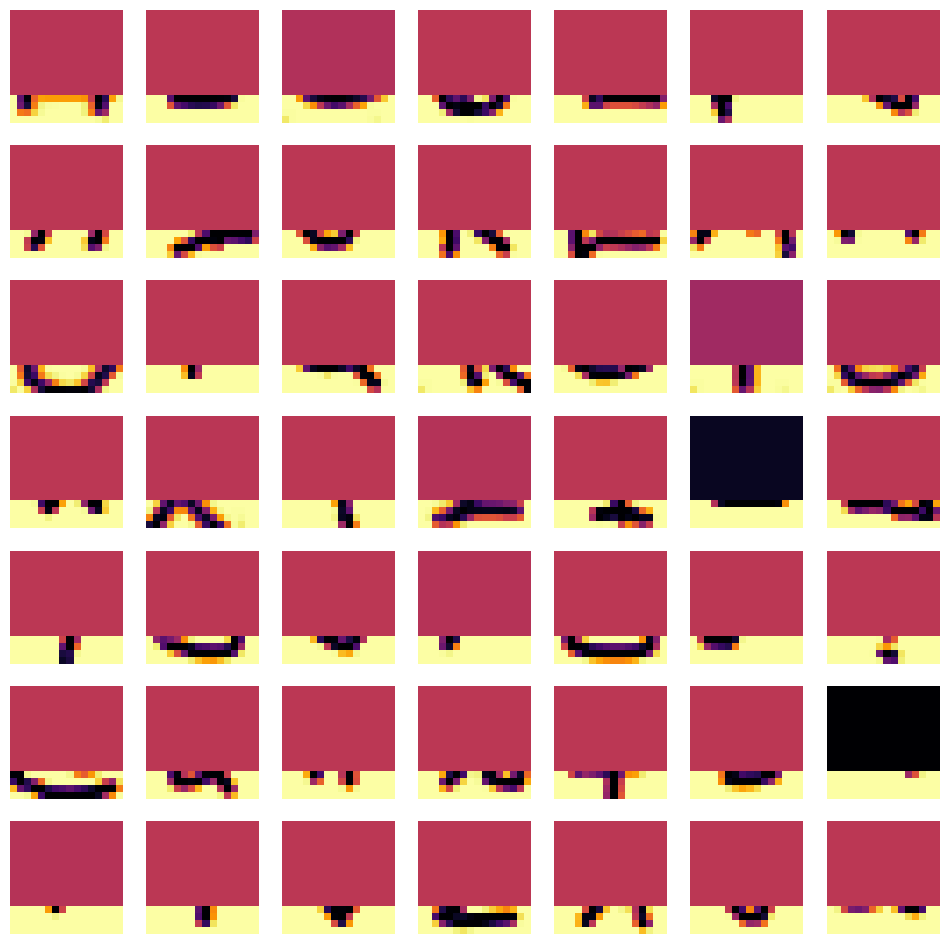

In [25]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(hopf.cut(noised_data1[i],192).reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Model result:

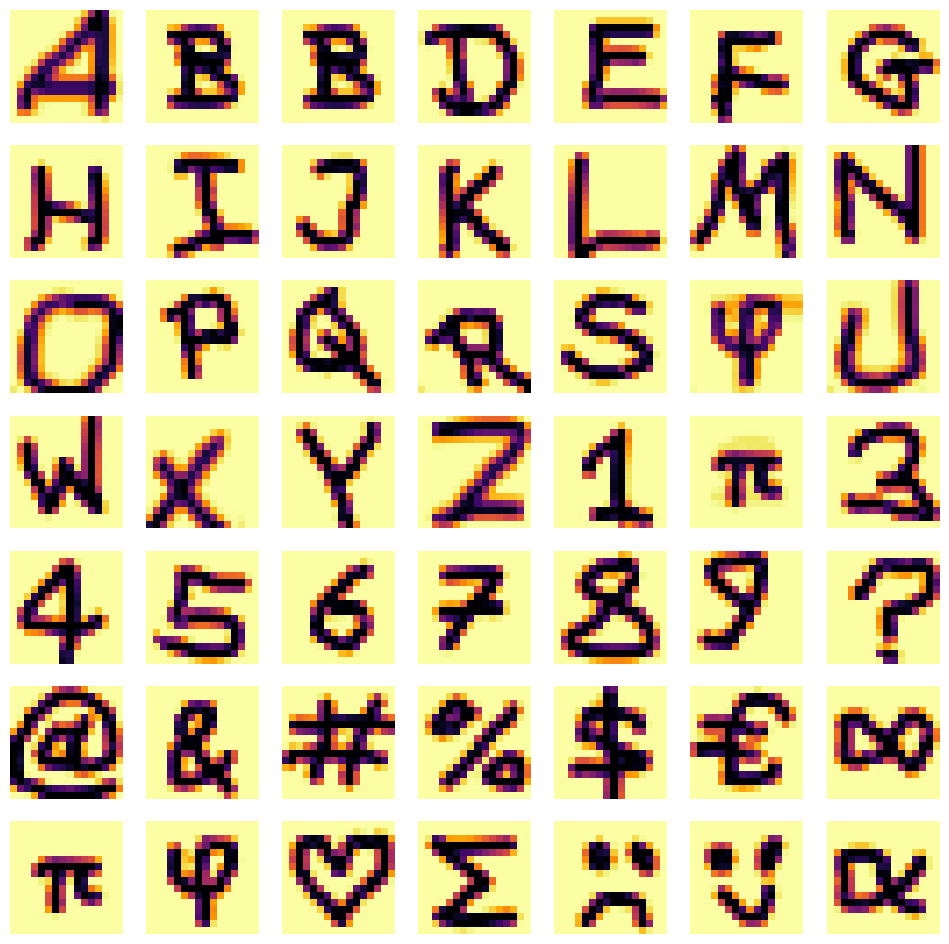

In [28]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  result, err = network1.hopfield_layer(hopf.cut(noised_data1[i],192),50)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Most of the patterns were recalled perfectly but 3 mistakes were made (letter *C*, letter *T*, number *2*). We can se what happend by lowering the $\beta$ argument.

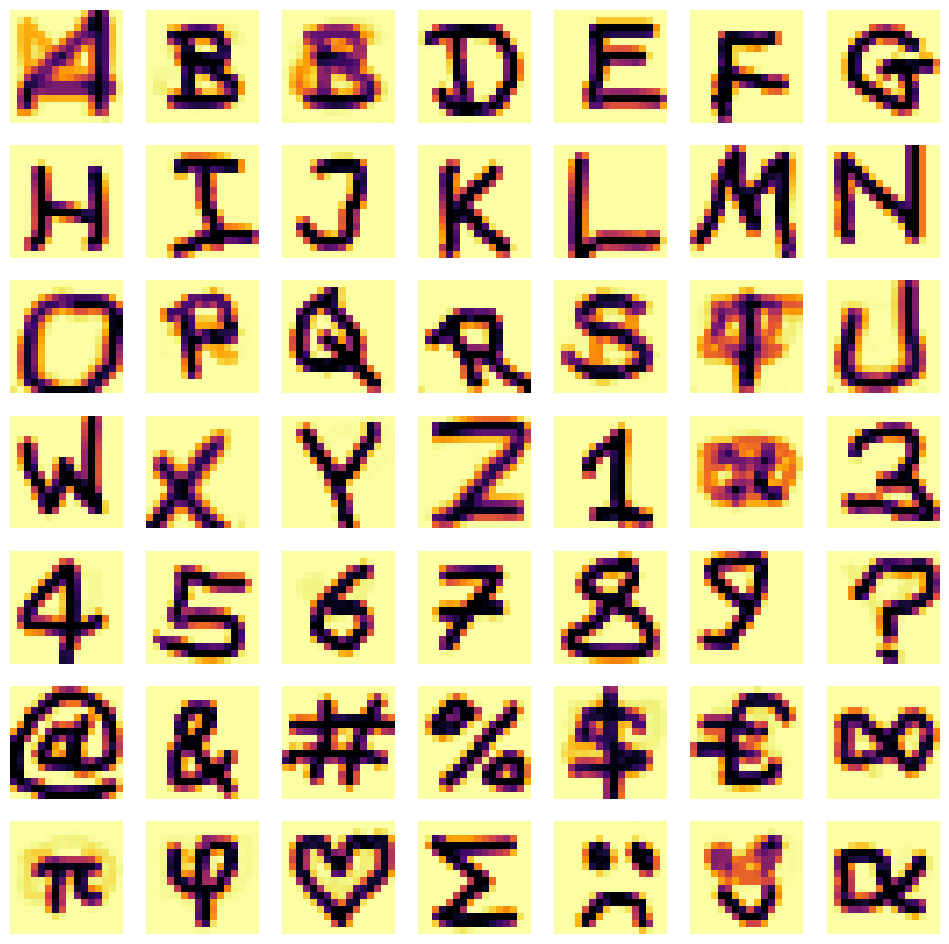

In [33]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  result, err = network1.hopfield_layer(hopf.cut(noised_data1[i],192),1)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

It seems like the given pixels of some pair were too close (or maybe even identical), therefore model could recall wrong pattern. Still, model should work if we give few more pixels in testing dataset, for example 8 more pixels. The dataset without 71.875% of pixels looks like this:

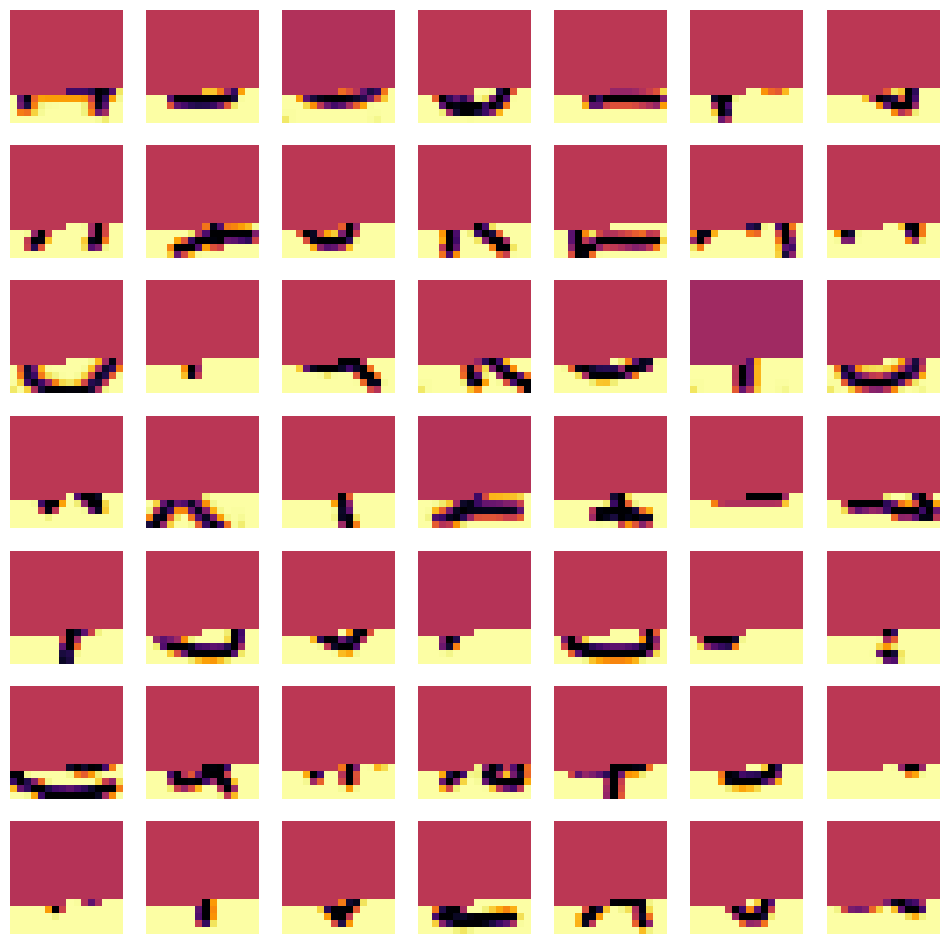

In [34]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(hopf.cut(noised_data1[i],184).reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

And new results:

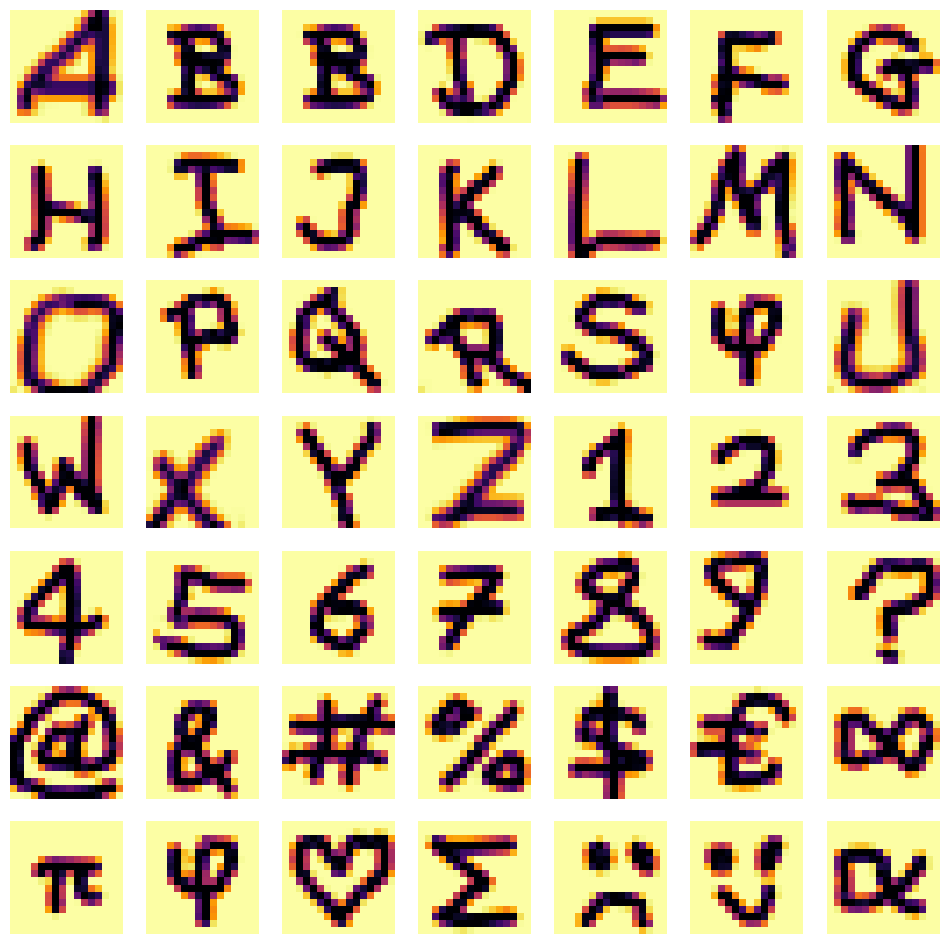

In [36]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  result, err = network1.hopfield_layer(hopf.cut(noised_data1[i],184),50)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Now every patter were recalled perfectly.